
<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
# **Práctico de Aprendizaje Supervisado**



Importamos las librerías necesarias:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

#sns.set_context('talk')
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")


En este práctico, utilizaremos el archivo original *fiji_datos_0al7mo_labels.csv* que se encuentra en la carpeta *data/raw/*.

Además sumaremos los siguientes datos sintéticos que se encuentran en la carpeta *data/datos_sinteticos/*:
  * datos_sinteticos_dias_3_y_5.csv
  * synthetic_3y5_sint2.csv
  * synthetic_data_dia_3_si.csv
  * synthetic_data_dia_4_si.csv
  * synthetic_data_dia_5_si.csv

Como también dos archivos extras que están en la capeta *data/03_AS/*:
  * fiji_datos_mean_diam.csv
  * fiji_datos_noise.csv
  

## Regresión

$1.$   Utilizando del día 1 al 5 los datos clasificados como 'Esferoide' = 'si', realizar un ajuste del diámetro medio. Sean los datos reales *mean_diam_df* y la señal ruidosa *df_noise*.


In [15]:
mean_diam_df = pd.read_csv("data/03_AS/fiji_datos_mean_diam.csv")
mean_diam_df

,dia,mean
0,0,23.145003
1,1,31.781506
2,2,60.685558
3,3,101.092311
4,4,89.688273
5,5,110.212304


In [16]:
df_noise = pd.read_csv("data/03_AS/fiji_datos_noise.csv")
df_noise

,dia,mean
0,0,23.288560
1,1,30.287199
2,2,67.158238
3,3,122.369407
4,4,120.851605
5,5,110.141722
6,0,14.068722
7,1,38.645930
8,2,63.240382
9,3,104.866656


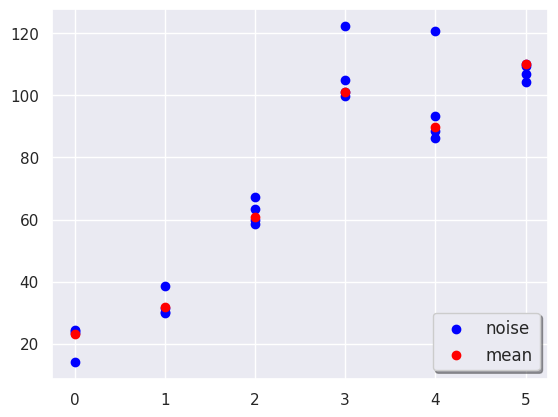

In [17]:
X_noise = df_noise['dia']
y_noise = df_noise['mean']
X_noise = np.array(X_noise.to_list())
y_noise = np.array(y_noise.to_list())

X_mean = mean_diam_df['dia']
y_mean = mean_diam_df['mean']
X_mean = np.array(X_mean.to_list())
y_mean = np.array(y_mean.to_list())


plt.scatter(X_noise, y_noise, color="blue", label="noise")
plt.scatter(X_mean, y_mean, color="red", label="mean")

legend = plt.legend(loc='lower right', shadow=True, fontsize='medium')

# Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C9')


plt.show()

## Probar un ajuste lineal, polinomial, probar el ajuste "óptimo" que da el menor error cuadrático y sobreajuste.  

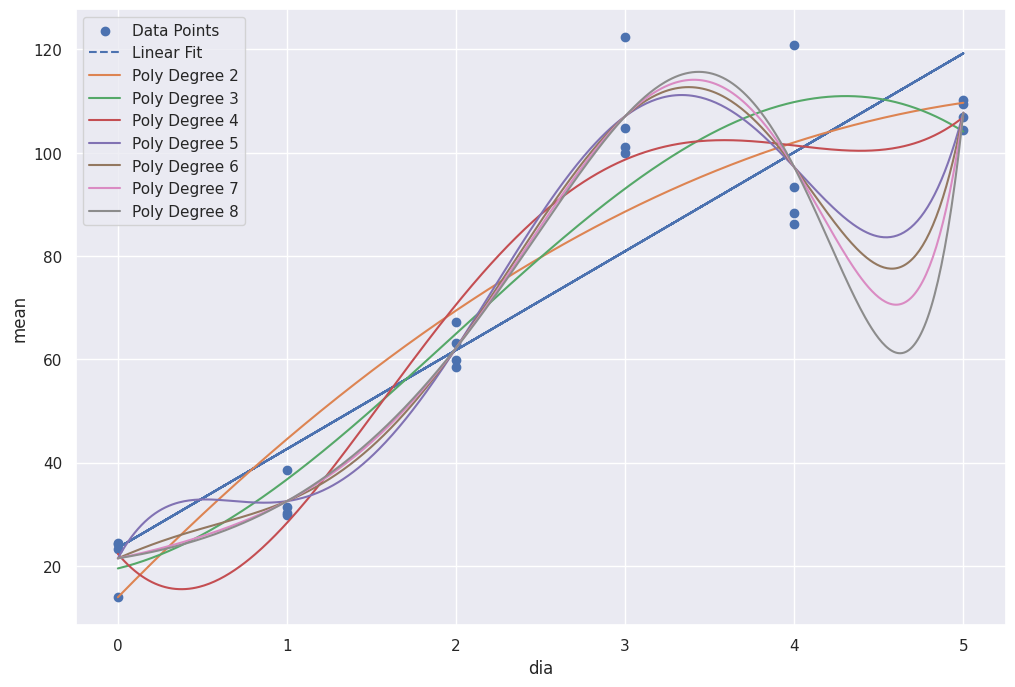

Linear - MSE: 208.57270812882277, R2: 0.8368330514664313
Poly_2 - MSE: 157.29561113119613, R2: 0.8769472520338177
Poly_3 - MSE: 119.94671373935539, R2: 0.9061653873938671
Poly_4 - MSE: 83.24985961412408, R2: 0.9348734276840533
Poly_5 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_6 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_7 - MSE: 53.59041940266885, R2: 0.9580760815592092
Poly_8 - MSE: 53.59041940266885, R2: 0.9580760815592092
Best Model: Poly_5 with R2 = 0.9580760815592092


In [21]:
# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']

# Linear regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

# Evaluate linear model
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

# Store evaluation metrics and models for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse': mse_lin, 'r2': r2_lin}}
best_model = {'name': 'Linear', 'r2': r2_lin}

# Polynomial regression (from degree 2 to n)
max_degree = 8  # change this to try out different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    # Evaluate polynomial model
    mse_poly = mean_squared_error(y, y_pred_poly)
    r2_poly = r2_score(y, y_pred_poly)

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse': mse_poly, 'r2': r2_poly}

    # Update best model if needed
    if r2_poly > best_model['r2']:
        best_model = {'name': model_name, 'r2': r2_poly}

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred_lin, label='Linear Fit', linestyle='--')

# Plot polynomial fits
x_range = np.linspace(min(X.values), max(X.values), 500).reshape(-1, 1)
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_range = poly.fit_transform(x_range)
    y_poly_range = model_metrics[f'Poly_{degree}']['model'].predict(X_poly_range)
    plt.plot(x_range, y_poly_range, label=f'Poly Degree {degree}')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - MSE: {metrics['mse']}, R2: {metrics['r2']}")

print(f"Best Model: {best_model['name']} with R2 = {best_model['r2']}")


De esto, parece que el mejor modelo termina siendo el de grado 5. Revisemos esto usando un criterio que penalice de manera directa el añadir complejidad. Usemos el [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) para elegir. 

Nota: no uso BIC porque no creo que el modelo “real” esté siendo considerado.

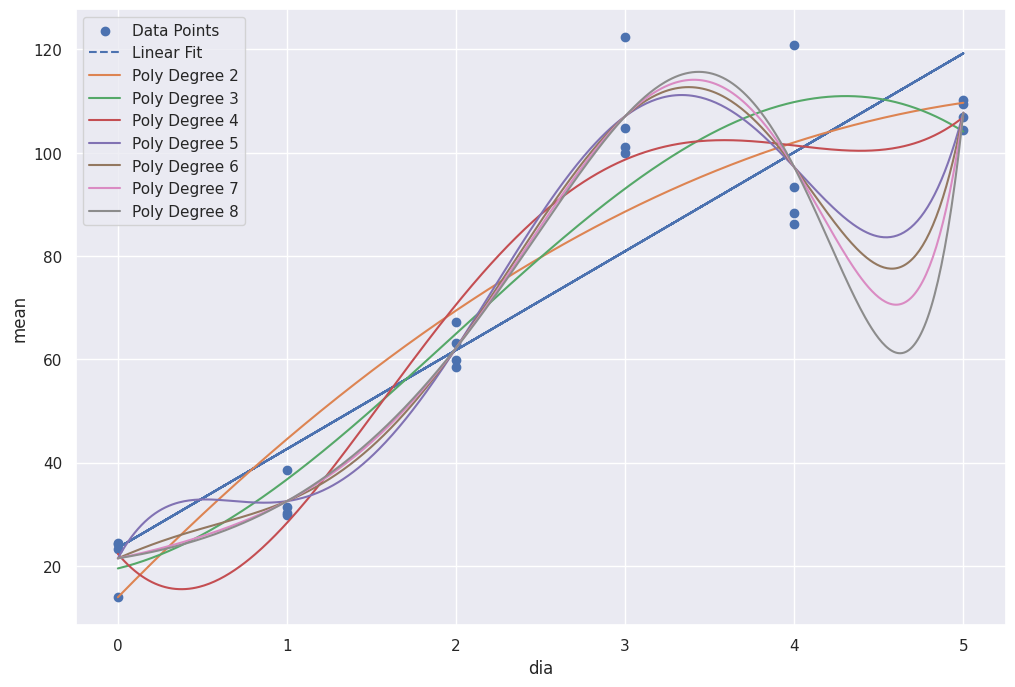

Linear - MSE: 208.57270812882277, AIC: 55.89361288346856
Poly_2 - MSE: 157.29561113119613, AIC: 51.1217538735165
Poly_3 - MSE: 119.94671373935539, AIC: 46.6158502794008
Poly_4 - MSE: 83.24985961412408, AIC: 39.851022692664586
Poly_5 - MSE: 53.59041940266886, AIC: 31.27959550235873
Poly_6 - MSE: 53.59041940266886, AIC: 33.27959550235873
Poly_7 - MSE: 53.59041940266885, AIC: 35.27959550235873
Poly_8 - MSE: 53.59041940266885, AIC: 37.27959550235873
Best Model: Poly_5 with AIC = 31.27959550235873


In [23]:
# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']
n = len(y)

# Function to calculate AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse / n) + 2 * num_params
    return aic

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)
aic_lin = calculate_aic(n, mse_lin, 2)  # 2 parameters: intercept and slope

# Store for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse': mse_lin, 'aic': aic_lin}}
best_model = {'name': 'Linear', 'aic': aic_lin}

# Polynomial Regression (from degree 2 to n)
max_degree = 8  # Change this to try different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y, y_pred_poly)
    aic_poly = calculate_aic(n, mse_poly, degree + 1)  # degree+1 parameters

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse': mse_poly, 'aic': aic_poly}

    # Update best model if needed
    if aic_poly < best_model['aic']:
        best_model = {'name': model_name, 'aic': aic_poly}

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred_lin, label='Linear Fit', linestyle='--')

# Plot polynomial fits
x_range = np.linspace(min(X.values), max(X.values), 500).reshape(-1, 1)
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_range = poly.fit_transform(x_range)
    y_poly_range = model_metrics[f'Poly_{degree}']['model'].predict(X_poly_range)
    plt.plot(x_range, y_poly_range, label=f'Poly Degree {degree}')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - MSE: {metrics['mse']}, AIC: {metrics['aic']}")

print(f"Best Model: {best_model['name']} with AIC = {best_model['aic']}")


Ambos criterios coinciden en que el mejor ajuste polinomial es el de grado 5. Grafiquemos el resultado, incluyendo los puntos de `mean_diam_df`.

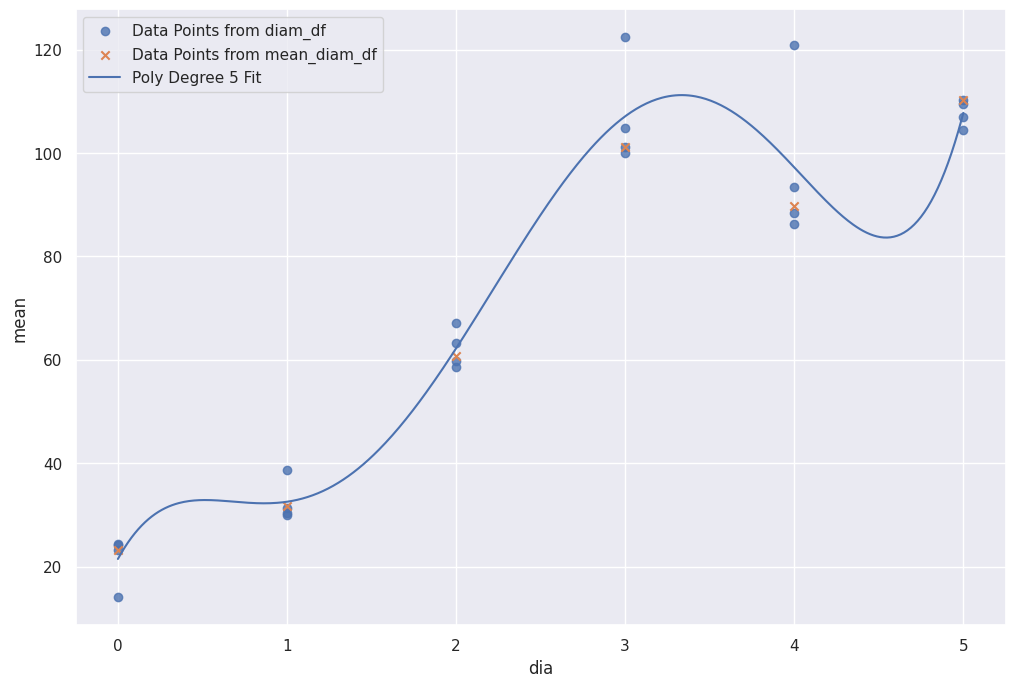

In [25]:
# (previous code for fitting models is required)

# Extract data from mean_diam_df
X_mean = mean_diam_df[['dia']]
y_mean = mean_diam_df['mean']

# Plotting
plt.figure(figsize=(12, 8))

# Plot data points from diam_df
plt.scatter(X, y, label='Data Points from diam_df', marker='o', alpha=0.8)

# Plot data points from mean_diam_df
plt.scatter(X_mean, y_mean, label='Data Points from mean_diam_df', marker='x', alpha=1.0)

# Plot polynomial fit of degree 5
poly_5 = PolynomialFeatures(degree=5)
X_poly_5_range = poly_5.fit_transform(x_range)
y_poly_5_range = model_metrics['Poly_5']['model'].predict(X_poly_5_range)
plt.plot(x_range, y_poly_5_range, label='Poly Degree 5 Fit', linestyle='-')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()


## Clasificación

Aquí vamos a usar el dataset sin modificar, que se encuentra en 'raw/fiji_datos_0al7mo_labels.csv', en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link).

1) Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.
   
2) El dataset que tenemos, es linealmente separable?

3) Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link):

4) Elegir una de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

  * Tomar todo el dataset.

  * Realizar clasificación sólo con los datos del día 3, 4 y 5.

  * Tomar solo los días 3, 4 y 5, y sumar los datos sintéticos.
  
  * Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.

\
**Elegir un escenario**, recordar eliminar una de las columnas altamente correlacionadas y también aquellas que no suman al problema. Si hubiera una columna constante, también deberían excluirla. Separen en conjuntos de entrenamiento y test, hacer tratamiento de ouliers, agregar columnas preprocesadas al original como algunas que sean combinaciones/modificaciones de las demás, multiplicaciones, logaritmos, potencias, [por ej](https://docs.google.com/presentation/d/e/2PACX-1vSLfKgsq-NuF2aWQF3OPkgLvBn25A2khGh0QIJkpFb6QgRZ7dGne32GEkTiC4M6yg/pub?start=false&loop=false&delayms=3000&slide=id.gb81ac3e375_0_32), verificando que no sean correlacionadas con las que ya tienen.


**Recordar que las transformaciones se realizan sobre el conjunto de train y luego se ajusta el de test**. Si hacen todo antes y luego separan, puede haber traspaso de información sobre el conjunto de train al test (*data leakage*).


Realizar un EDA rápido de como quedaron las variables y si la distribuciones en test son similares a las que tienen en train.
En todos los casos, tanto para train y test, visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

Tenemos pocos datos, es muy posible que se genere overfitting. Cómo podrían tratar de solventar este inconveniente? Implementar si es posible.

Implementar sobre los conjuntos *test* y *train* del escenario elegido algún clasificador lineal como también probar DT, Random Forest y XGBoost.

Explorar con parámetros de defecto (modelo baseline) y con búsqueda de hiperparámetros y por medio de las diferentes métricas (sobre todo f1 y precision) determinar cuál es el mejor algoritmo de clasificación.
En los algoritmos que lo permitan, hacer listado de importancia de features y probar con diferentes combinaciones de columnas si la métrica hallada mejora si se disminuye la cantidad de columnas (puede ser que esto no ocurra también).

Con el algoritmo que tenga las mejores métricas , probar si mejora o empeoran la clasificación probando algún otro escenario (con todos los pasos que implica).

\
OPCIONAL:


Probar la métrica: coeficiente de correlación de [Matthews](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7) (está implementado en sklearn como una métrica más: *from sklearn.metrics import matthews_corrcoef* )

Si se animan, tenemos 5 días. Probar clasificación multiclase para identificar a q día se corresponden las muestras. O tomar solo los 3 que usaron en los escenarios anteriores.

Super buenas prácticas en este [repositorio](https://github.com/daianadte/wids-cba-2023/), es muy instructivo chusmear sobre todo el archivo  ['06_FinalModel.ipynb'](https://github.com/daianadte/wids-cba-2023/blob/main/06_FinalModel.ipynb) solo para que vean un análisis posterior a implementar los modelos y que existen los Shap Values, que es una técnica utilizada para explicar las predicciones.


----
Como este es el último práctico, si se animan, podrían implementar clústering.
Pueden implementar kmeans sobre el dataset normalizado, usando PCA, o incluso animarse a probar t-SNE y UMAP.

Realizar EDA sobre los conjuntos que encontraron y traten de explicarlos.

Muchas veces en problemas de negocios, no es tan importante el modelo en sí, qué tan bien separa los datos sino la interpretabilidad que se puede dar a los resultados. Podríamos coordinar con Luciano para charlar si lo que encontraron a partir de las agrupaciones, es coherente o no, sería como parte de charlar con el "cliente" a ver si está de acuerdo a lo hallado. O sea, pueden encontrar explicaciones a los datos distintos que la de "esferoides".


$1.$ Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.

In [ ]:
#...

$2.$ El dataset que tenemos, es linealmente separable?.

In [ ]:
#...

$3.$ Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del repositorio y de la carpeta compartida.

In [ ]:
#...

$4.$ Elegir uno de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

* Tomar todo el dataset.

* Realizar clasificación con solo los datos del día 3, 4 y 5.

* Tomar solo los días 3,4 y 5 y sumar los datos sintéticos.
  
* Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.

In [ ]:
#...